(chapter:3dplotting)= 

# Plotting bivariate functions in R

This chapter is a quick guide to plotting 3D surface plots and contour plots for functions of two variables in R. Following the discussion you should be able to plot any simple bivariate function and customise your graph.

All the examples below only use the core functionality of R (available with any installation through the in-built R `graphics` package) and do not require the installation of additional packages.

:::{tip}
The discussion builds upon the material from chapters {ref}`chapter:plotting` and {ref}`chapter:functions`, so make sure that you have gone through these already.
:::

The best way to work through the chapter is to read the discussion and then reproduce all code in your own R/RStudio installation. You can do this by copying code from a notebook cell to your R script and run the code line by line.

The chapter includes some exercises that allow you to test your understanding. It is recommended that you try these exercises on your own before choosing the option to reveal the solutions.

## Creating a 3D surface plot for a function of two variables. 

Conceptually, the procedure for plotting bivariate functions in three dimensions is very similar to the procedure for plotting univariate functions in two dimensions, as discussed in {ref}`chapter:plotting`. 

In order to set the stage let's revisit the procedure for plotting functions of one variable. For example, to plot $y=x^2-1$ for $x\in[-2,2]$ we follow the following 3-step procedure:

**Step 1** 

Define a vector, `x`, of evenly spaced $x$ coordinates for $x\in[-2,2]$.

In [1]:
x <- seq(-2,2,by=0.25)

**Step 2**

Assign the corresponding $y$ coordinates to `y`. To emphasise the similarity to the procedure for 3D plots, let's do this by using a function `f` implementing $f(x)$.

In [2]:
f <- function(x){return(x^2-1)}
y <- f(x)

**Step 3**

Plot `x` against `y` using the function `plot()` with the optional argument `type="l"`

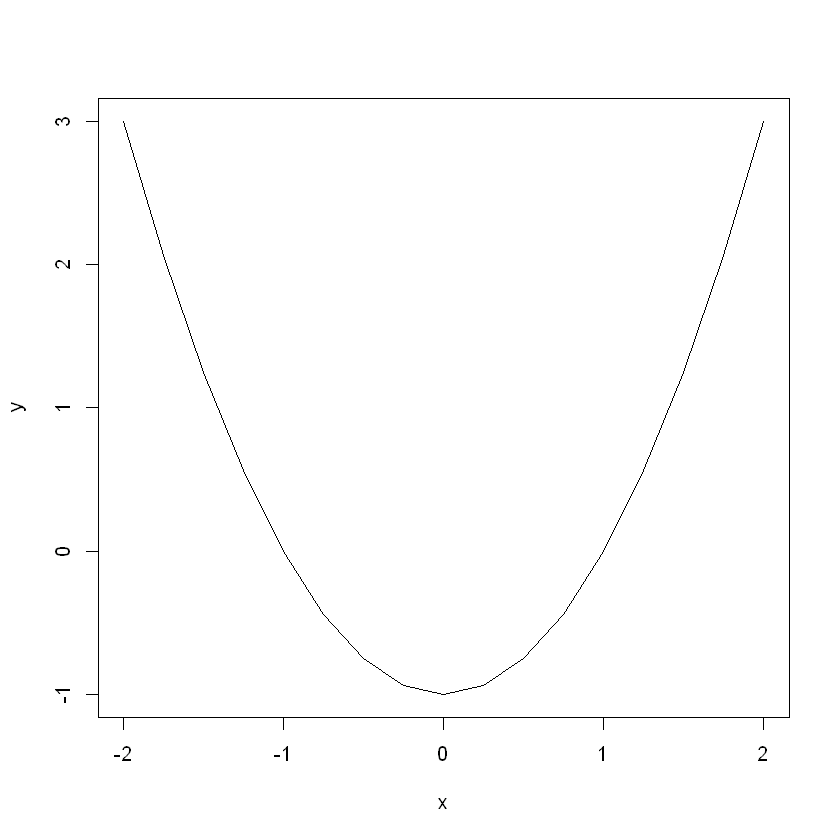

In [3]:
plot(x,y,type="l")

For plotting surface (3D) plots of bivariate functions we follow logically the same 3-step procedure, with small changes of the syntax.

Suppose that we want to plot the bivariate function $z=-x^2-y^2$ for $x\in[-10,10]$ and $y\in[-10,10]$.

### Step 1
Define 
- a vector `x` of evenly spaced $x$-coordinates for $x\in[-10,10]$ and
- a vector `y` of evenly spaced $y$-coordinates for $y\in[-10,10]$

In [4]:
x <- seq(-10, 10, by = 1)
y <- seq(-10, 10, by = 1)

Note that at this step the only difference with respect to **Step 1** for univariate functions, is that now we have two axes for the values of the arguments.

### Step 2

Assign the corresponding $z$ coordinates to `z`. As above define a function `f` implementing $f(x,y)$. Then create the corresponding $z$ coordinates by using the code `z <- outer(x,y,f)`[^1]

[^1]: At this stage don't worry about what the `outer()` function does - we will look at this soon. For now just keep in mind that this is always the correct piece of code needed to generate corresponding `z` coordinates from vectors `x` and `y` and a function `f`.

In [5]:
f <- function(x,y){return(-x^2 - y^2)}
z <- outer(x,y,f); 

Note that at this step the only difference with respect to **Step 2** for univariate functions is that we assign the $z$ coordinates by using the `outer()` function rather than through a direct call to `f`

### Step 3

Plot `x` and `y` against `z` using the function `persp()` (for *perspective*) with usage 
```
persp(x,y,z,...)
```
where `...` denotes optional arguments.

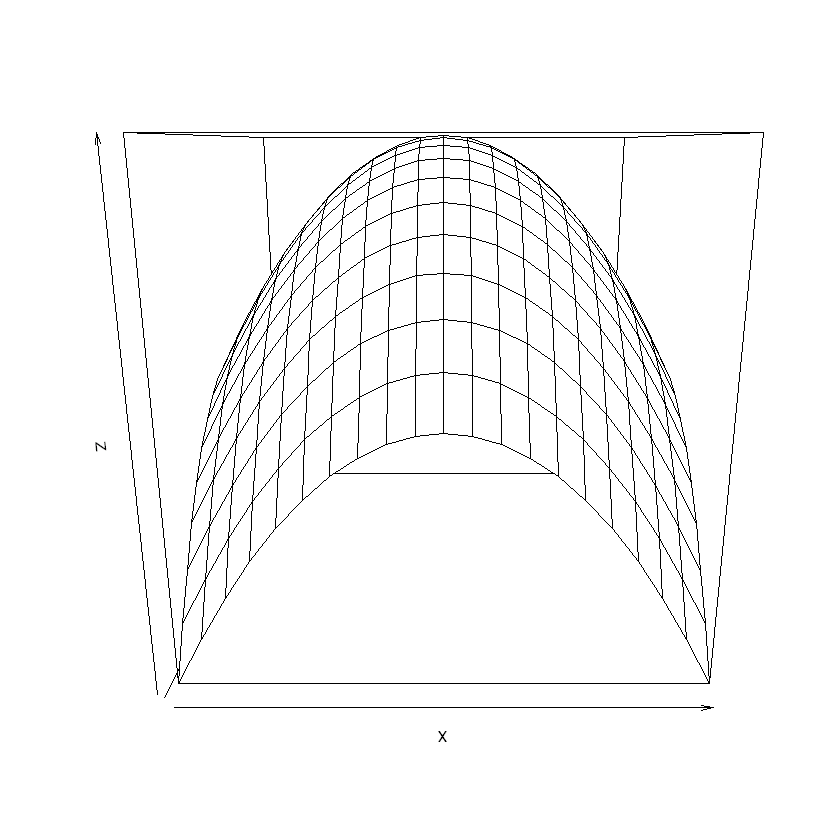

In [6]:
persp(x, y, z)

Note that at this step the only difference with respect to **Step 3** for univariate functions is that we use `persp()` rather than `plot()`.

And that's it. For clarity, let's palce everything in a single code block:

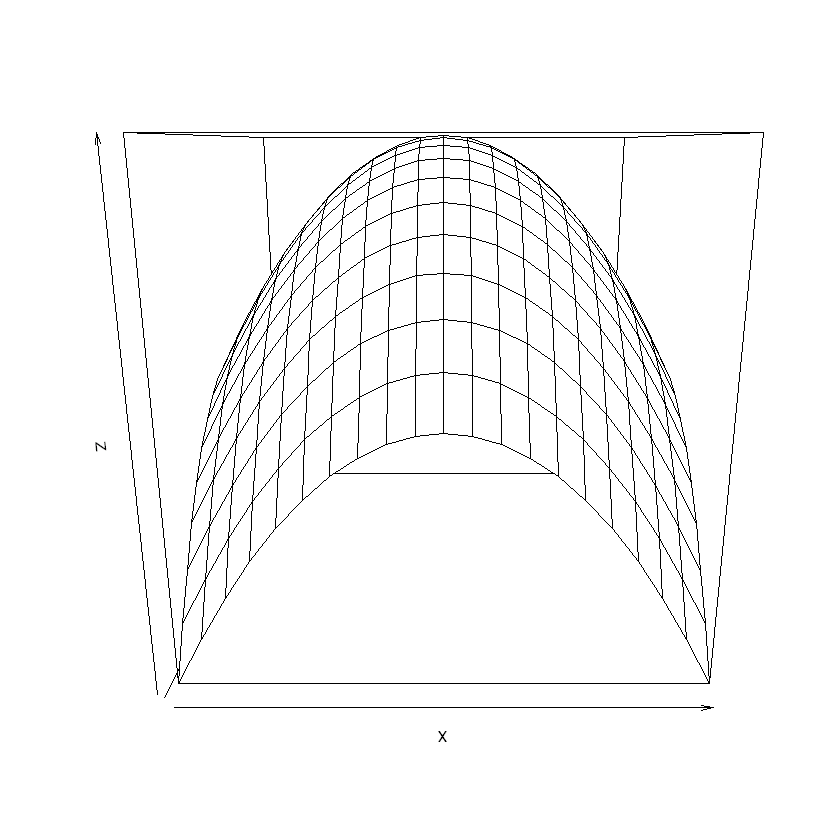

In [7]:
# Set coordinates for the arguments
x <- seq(-10, 10, by = 1)
y <- seq(-10, 10, by = 1)
# Assign corresponding z coordinates
f <- function(x,y){return(-x^2 - y^2)}
z <- outer(x,y,f); 
# Plot
persp(x, y, z)

By adjusting `x`, `y` and `f` you can plot the surface of any bivariate function.

### Customizing the look of the surface plot

As with `plot()`, when using `persp()` we can customize the look of the graph by using optional arguments.  

One important set of optional arguments that are specific to 3D plotting only are ones that allow us to specify the viewing direction - `theta` and `phi`. To understand how these work, imagine that you are on a sphere surrounding the graph and can move along the sphere to change your perspective. The argument `theta` allows you to move along "longitudes" of the sphere, while the argument `phi` allows you to move along "latitudes" of the sphere. The values of both `theta` and `phi` are set in terms of degrees of the angle by which you want to move.

For example, to move your perspective as a viewer by 30 degrees along the longitude type 

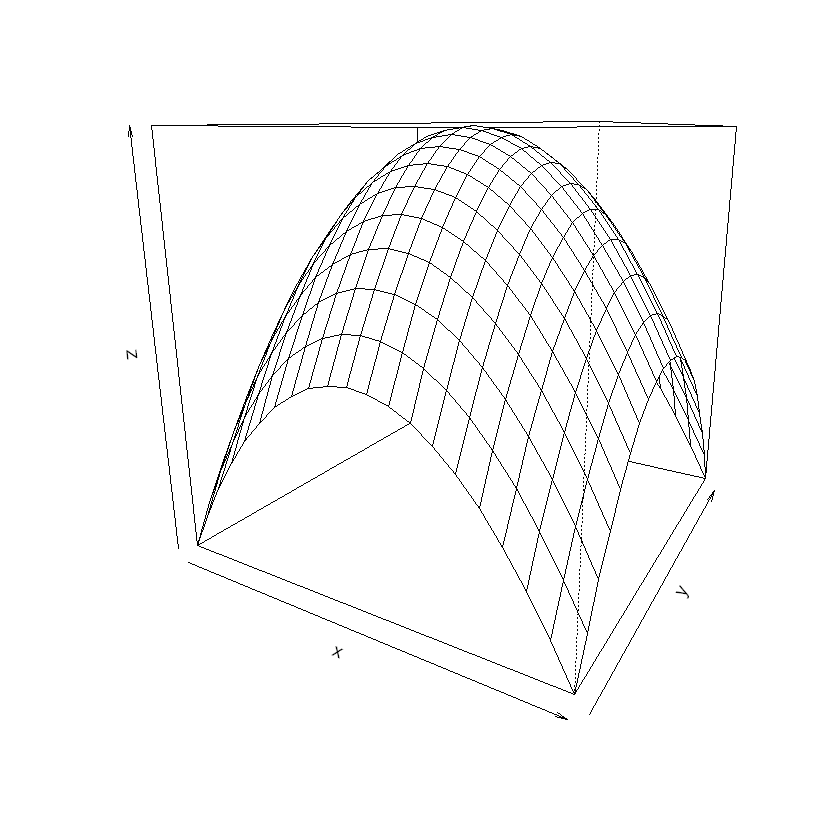

In [8]:
persp(x, y, z, theta=30)


Or to move by 30 degrees along the latitude type

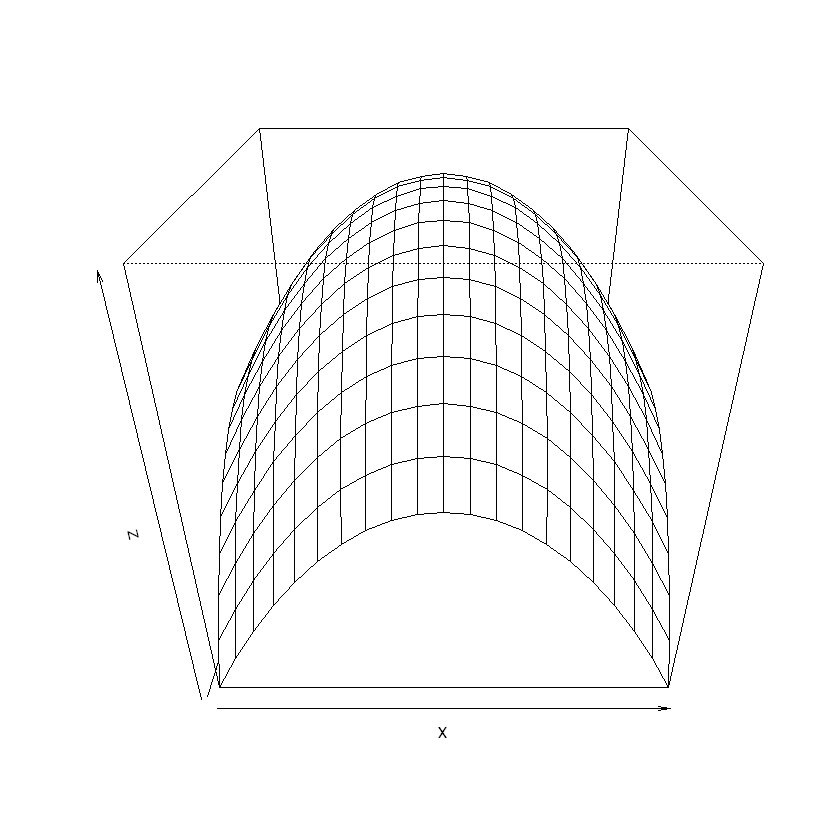

In [9]:
persp(x, y, z, phi=30)

Perhaps a better view involves moving along both longitude and latitude?

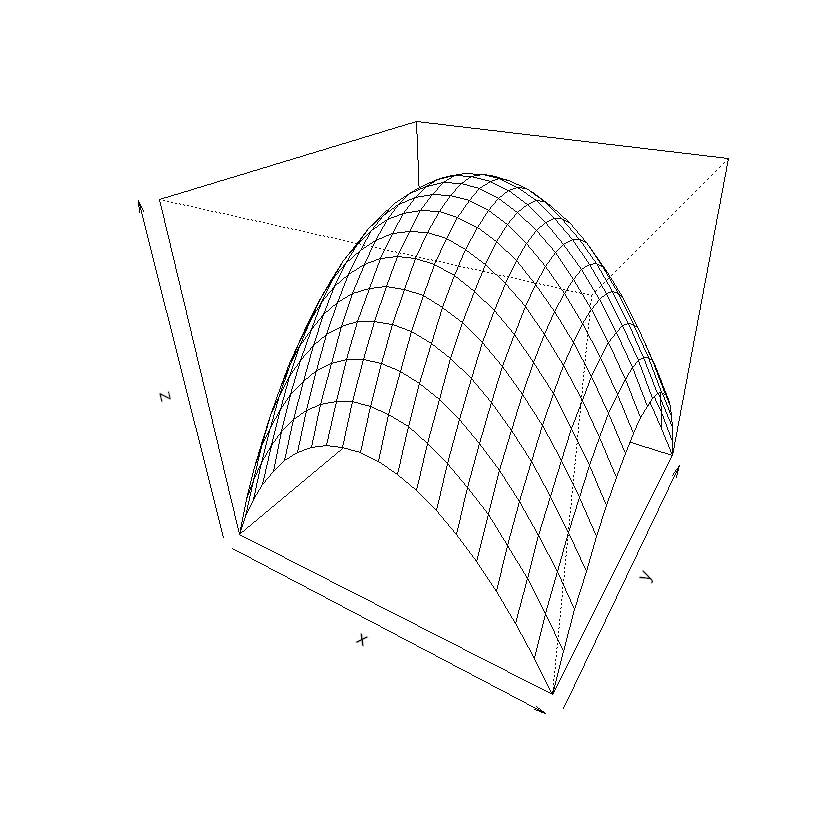

In [10]:
persp(x, y, z, theta=30, phi = 30)


We can change the colour of the surface by using `col`.

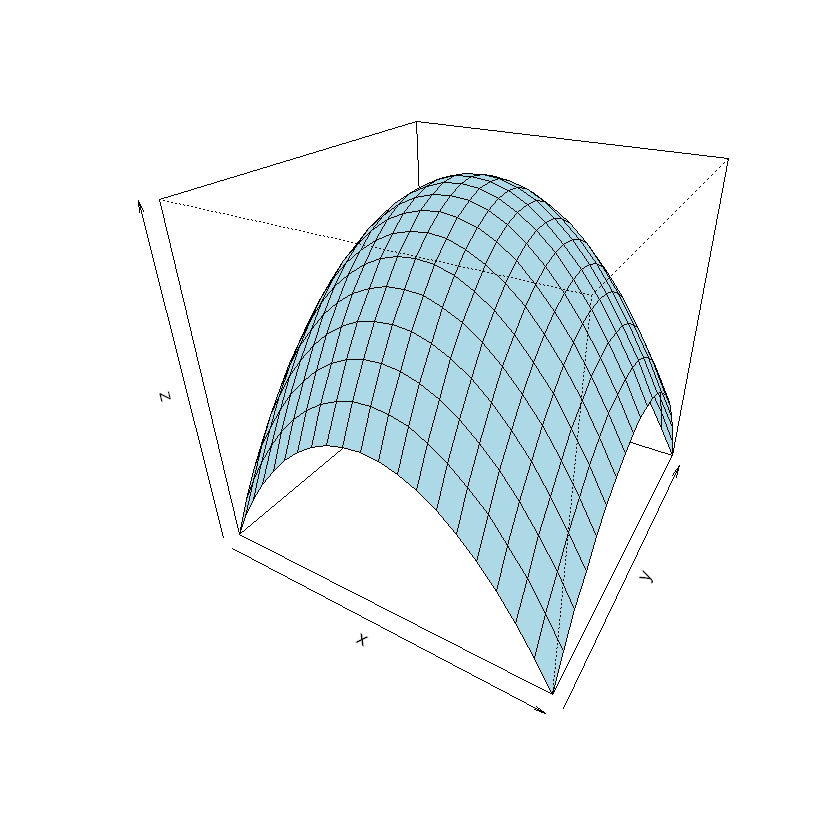

In [11]:
persp(x, y, z, theta=30, phi = 30, col = "lightblue")


We may want to remove the box?

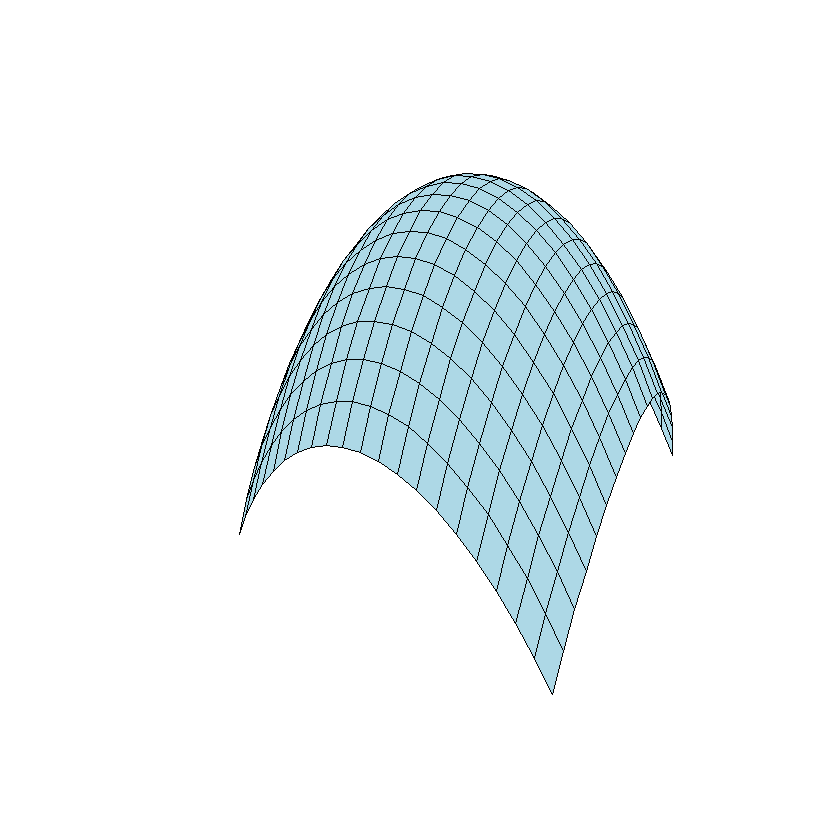

In [12]:
persp(x, y, z, theta=30, phi = 30, col = "lightblue", box=FALSE)


We may want to have *ticks* along the axes?

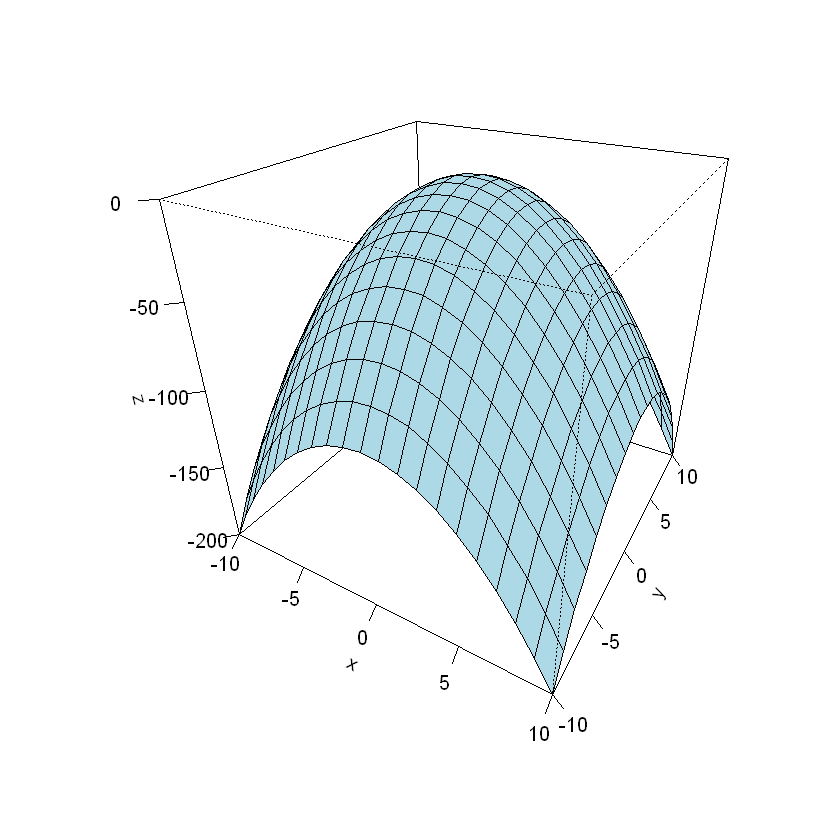

In [13]:
persp(x, y, z, theta=30, phi = 30, col = "lightblue", ticktype="detailed")


And so forth. 

:::{tip}
Of course, you don't need to remember all these optional arguments. You can simply type `?persp` in the R console to look for the documentation of the function, or find a lot of online resources that discuss 3D plotting with `persp()` in detail.
:::

In [14]:
x <- seq(-10,10,by=1);
y <- seq(-10,10,by=1);
f <- function(x,y){return(x^2-y^2)}
z <- outer(x,y,f)
png("fig-surface.png")
persp(x, y, z, theta=30, phi = 30, col = "lightblue")
dev.off()

pdf 
  2

::::{exercise}
:label: ex-surf

The figure below is a surface plot of $f(x,y)=x^2-y^2$ for $x\in[-10,10]$ and $y\in[-10,10]$.

The viewing direction is specified as `theta=30, phi=30`.

:::{image} fig-surface.png

:::

Reproduce the graph in your RStudio.

::::

::::{solution} ex-surf
:class: dropdown

The figure was generated with the following code

:::{code-block}
x <- seq(-10,10,by=1);
y <- seq(-10,10,by=1);
f <- function(x,y){return(x^2-y^2)}
z <- outer(x,y,f)
persp(x, y, z, theta=30, phi = 30, col = "lightblue")
:::

::::

## Creating a contour plot for a function of two variables

As seen in the lectures, a very useful type of graphical representation of functions of two variables is the contour plot.

The good news is that once you are familiar with the procedure of making surface plots, contour plots are straightforward to implement with R. 

For example, consider the function 

$$
z=-x^2-y^2
$$ 

whose surface we plotted above for $x\in[-10,10]$ and $y\in[-10,10]$ by using the code

:::{code-block}
x <- seq(-10, 10, by = 1)
y <- seq(-10, 10, by = 1)
f <- function(x,y){return(-x^2 - y^2)}
z <- outer(x,y,f); 
persp(x, y, z)
:::

In order to plot the contour plot for the same function for $x\in[-10,10]$ and $y\in[-10,10]$, we use exactly the same code, except that instead of plotting by calling `persp(x,y,z)` we call `contour(x,y,z)`

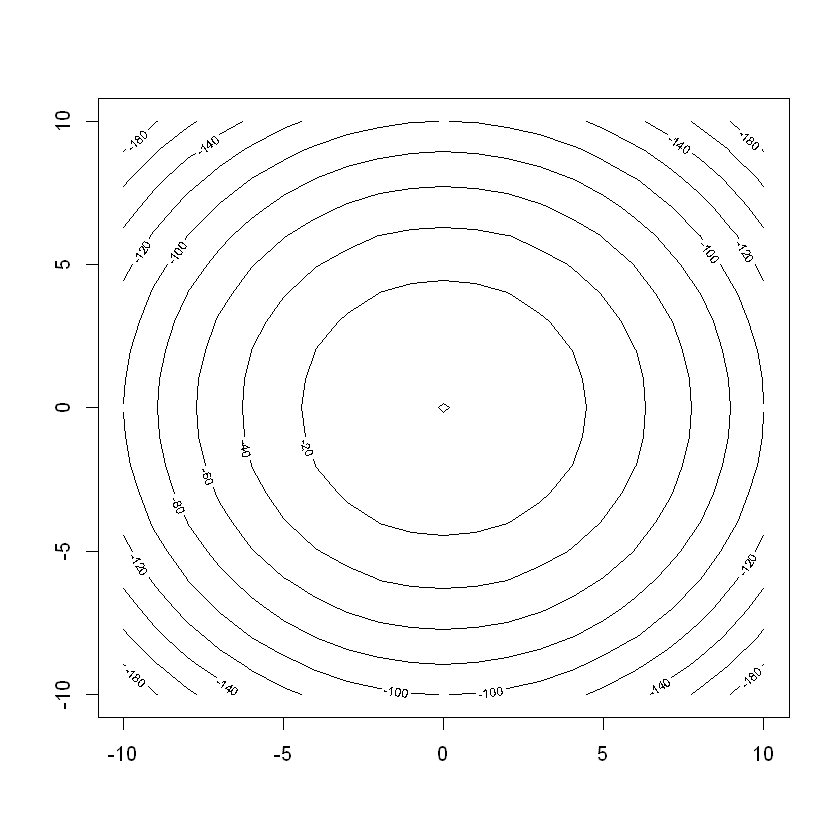

In [15]:
x <- seq(-10, 10, by = 1)
y <- seq(-10, 10, by = 1)
f <- function(x,y){return(-x^2 - y^2)}
z <- outer(x,y,f); 
contour(x, y, z)

The plot can be customized by using optional arguments. For example, to change the color of the contours

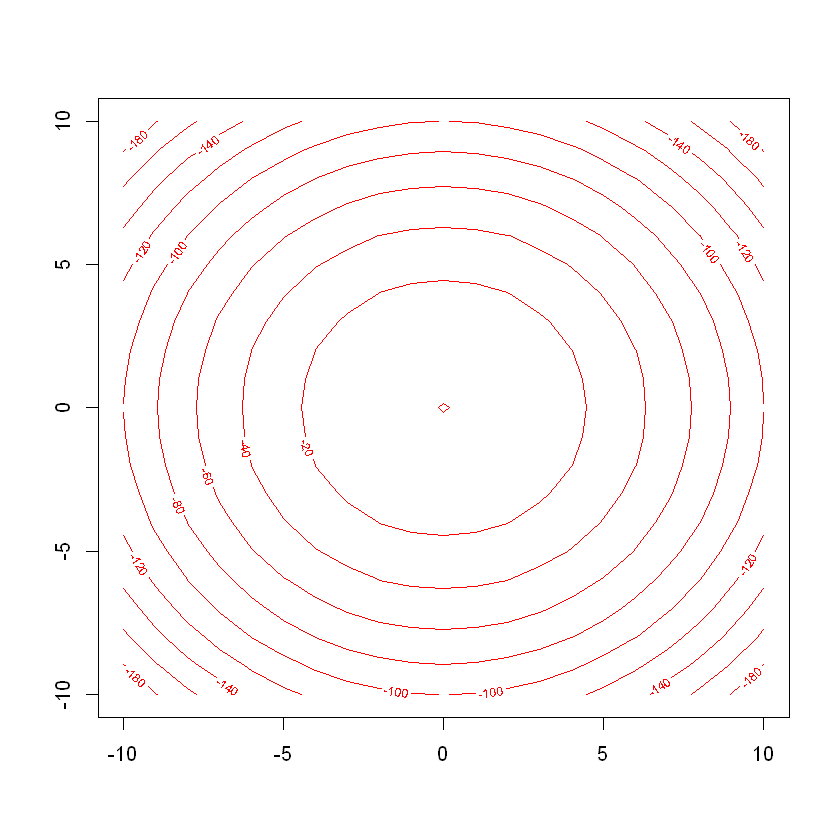

In [16]:
contour(x, y, z, col="red")

To make the contour lines thicker

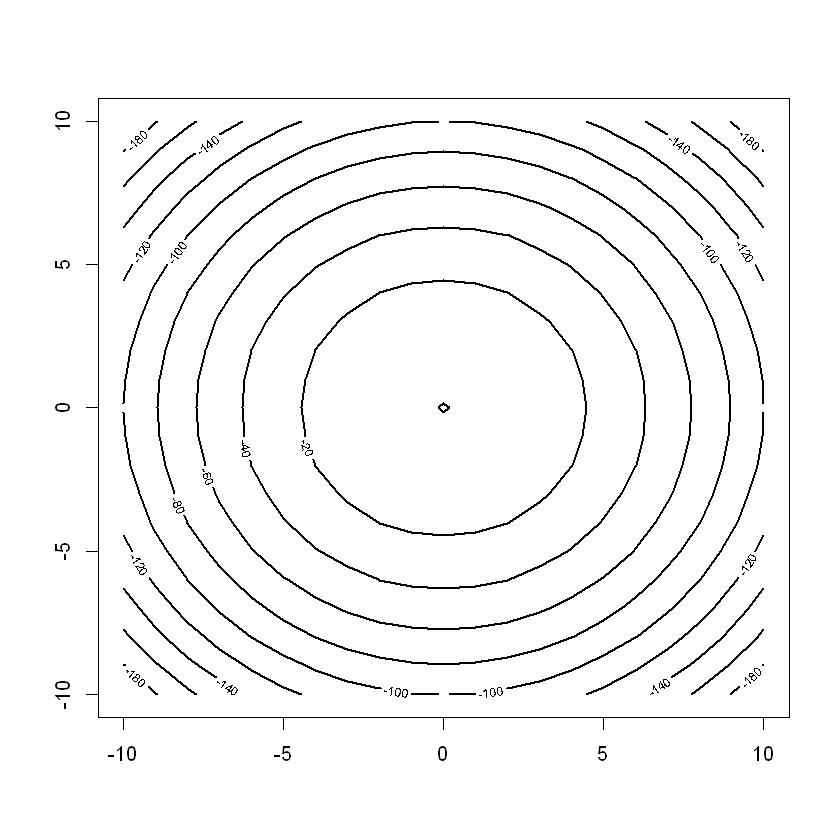

In [17]:
contour(x, y, z, lwd=2)

To change the number of contours plotted

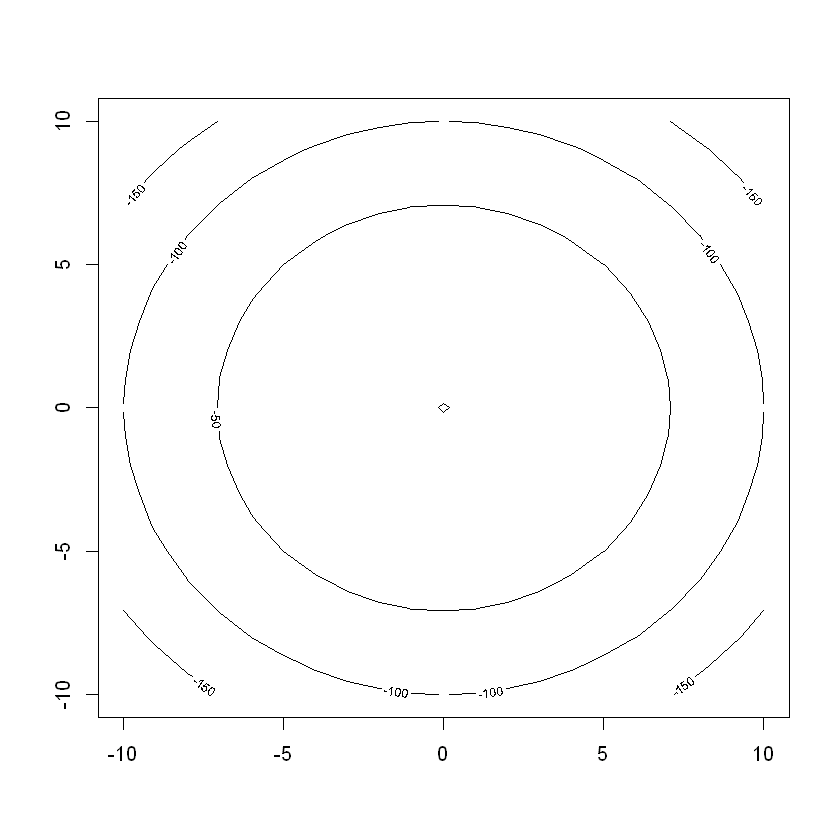

In [18]:
contour(x, y, z, nlevels=4)

We can also plot a contour plot with the areas between the contours filled in solid color, instead of `contour()` use the function `filled.contour()`

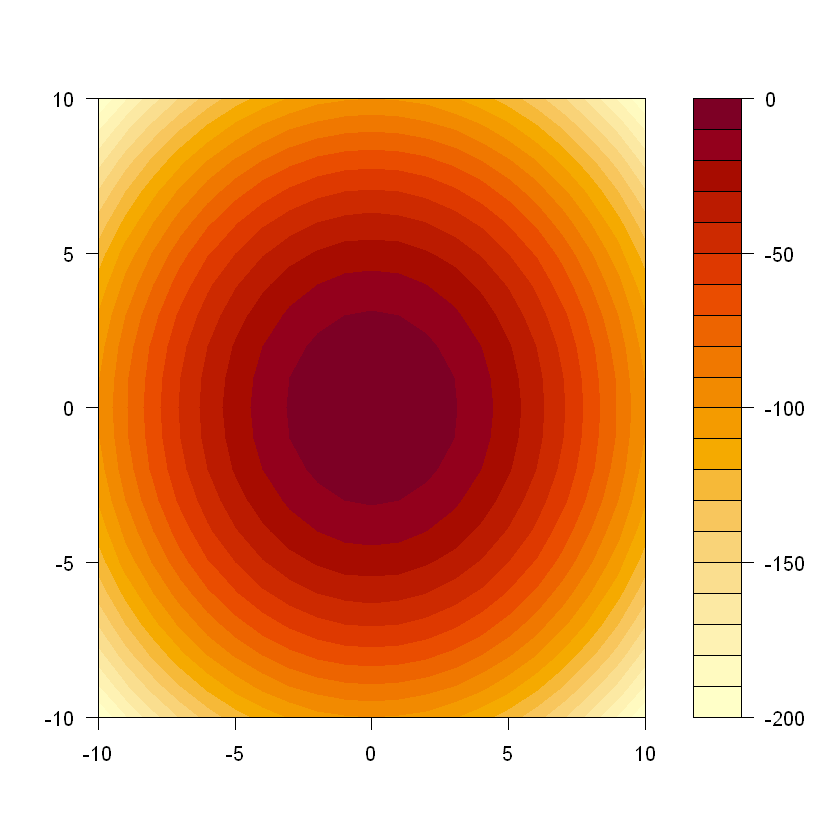

In [19]:
filled.contour(x, y, z)

An interesting (if a bit indulgent) feature is that with filled contours we can use color palettes (note that by default we have a lot of colors in such a plot so it is no longer sufficient to define the color, but the whole "color palette"). R has a number of in-built palettes which can be called as below (if you are interested check online how to do this).

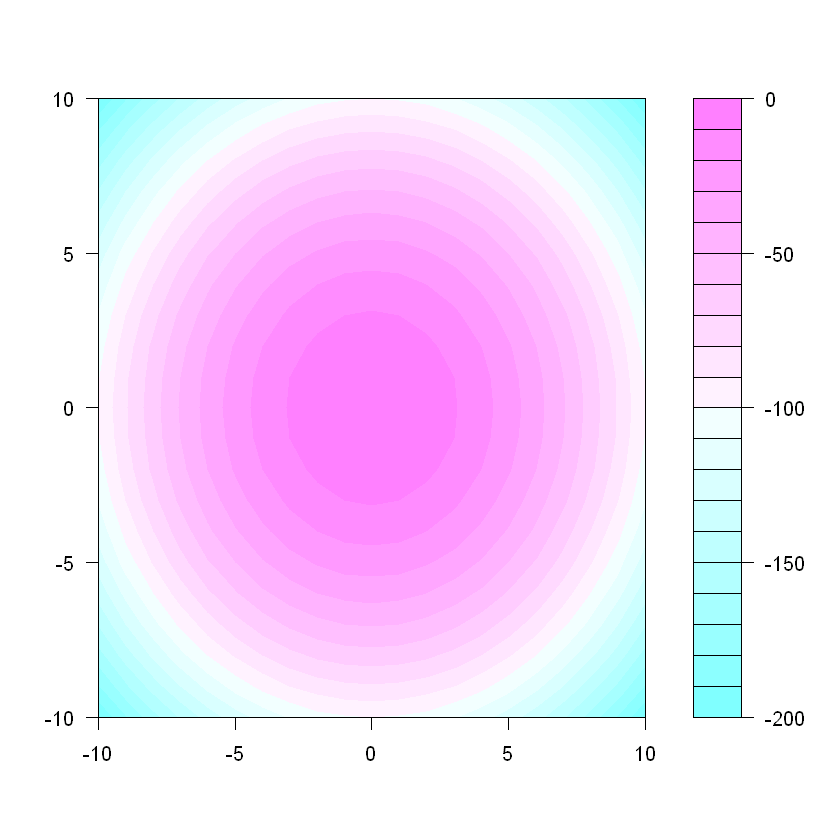

In [20]:
filled.contour(x, y, z, col = cm.colors(20))

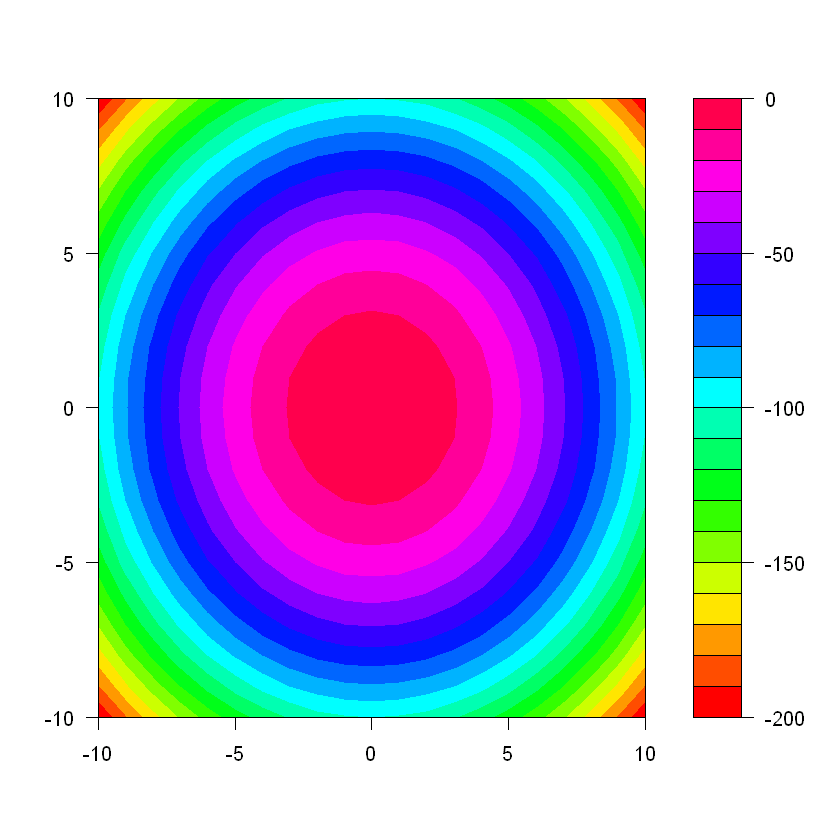

In [21]:
filled.contour(x, y, z, col = rainbow(20))

We can even use palettes with colors from Wes Anderson movies (if you haven't watched any I highly recommend them) but they come with an additional package that needs to be installed.

:::{code-block}
install.packages("wesanderson")
library(wesanderson)
:::

In [22]:
library(wesanderson)

Warning message:
"package 'wesanderson' was built under R version 4.3.3"


And here is a filled contour with colors from the Wes Anderson's "Grand Budapest Hotel"

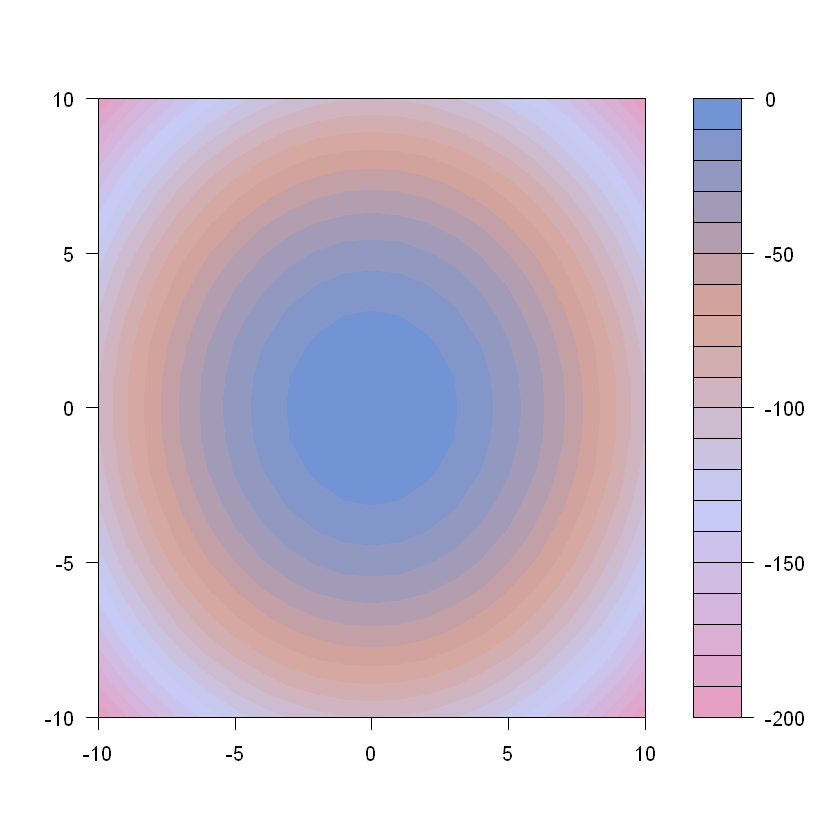

In [23]:
filled.contour(x, y, z, col = wes_palette("GrandBudapest2", n = 20, type="continuous"))

Anyhow, this is not so important. The important point is that it is very easy to make contour plots in R. 

In [24]:
x <- seq(0,5,by=0.1)
y <- seq(0,5,by=0.1)
f <- function(x,y){return((x^(1/3))*(y^(1/3)))}
z <- outer(x,y,f); 
png("fig-contourplot.png")
contour(x,y,z)
dev.off()

pdf 
  2

:::{exercise}
:label: ex-cont

Consider the utility function $u(x,y)=x^{1/3}y^{2/3}$.

Produce a simple graph of indifference curves from this utility function for $x\in[0,3]$ and $y\in[0,3]$ 
:::

::::{solution} ex-cont
:class: dropdown

A graph of indifference curves (indifference map) is nothing else but a contour plot of a utility function. Hence the code below produces such indifference map

:::{code-block}
x <- seq(0,3,by=0.1)
y <- seq(0,3,by=0.1)
f <- function(x,y){return((x^(1/3))*(y^(2/3)))}
z <- outer(x,y,f); 
contour(x,y,z)
:::

:::{image} fig-contourplot.png

:::
::::

## So what does `outer(x,y,f)` do?

As seen above, a key step in producing plots of a bivariate functions is defining appropriate set of $z$ coordinates corresponding to the $x$ and $y$ coordinates. Further, whether we produce surface plots or contour plots, given vectors of $x$ and $y$ coordinates and a specification of the function to be plotted $f$, these coordinates are defined consistently by the statement `z <- outer(x,y,f)`. In this section we turn attention to the `outer()` function and to understanding exactly what it does.

To set the stage, consider first a plot of a univariate function in two dimensions. For example

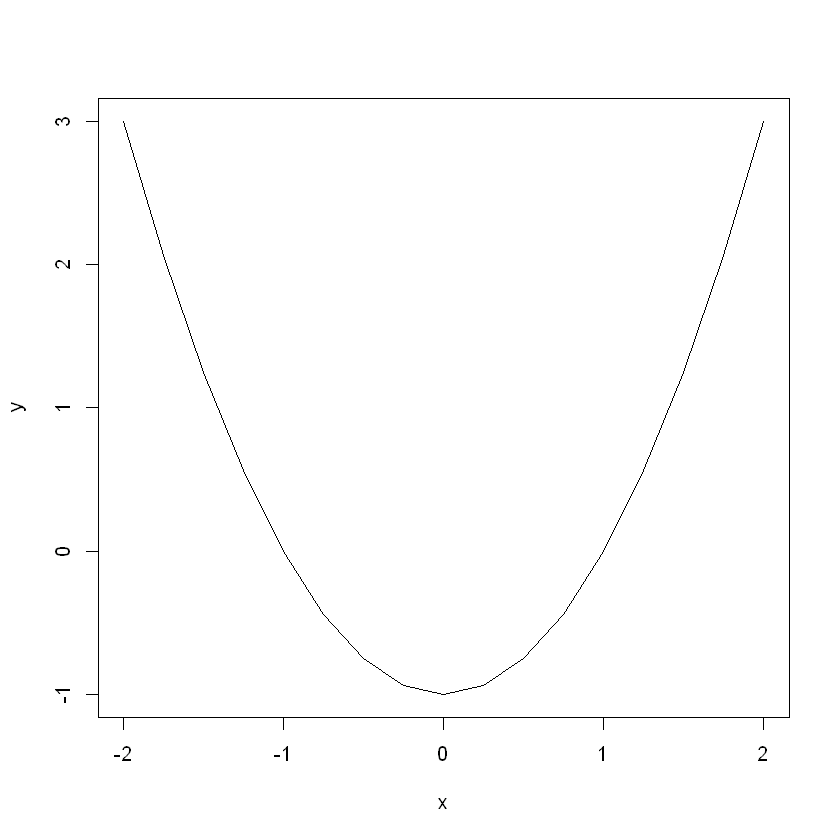

In [25]:
x <- seq(-2,2,by=0.25)
f <- function(x){return(x^2-1)}
y <- f(x)
plot(x,y,type="l")

Notice that in the case of a bivariate function both the $x$ and $y$ coordinates are specified as vectors of the same number of elements

In [26]:
x

[1] -2.00 -1.75 -1.50 -1.25 -1.00 -0.75 -0.50 -0.25  0.00  0.25  0.50  0.75
[13]  1.00  1.25  1.50  1.75  2.00

In [27]:
length(x)

[1] 17

In [28]:
y

[1]  3.0000  2.0625  1.2500  0.5625  0.0000 -0.4375 -0.7500 -0.9375 -1.0000
[10] -0.9375 -0.7500 -0.4375  0.0000  0.5625  1.2500  2.0625  3.0000

In [29]:
length(y)

[1] 17

because a univariate function maps a value of $x$ into a unique value of $y$. For each $x$ there is exactly one $y$.

However, in the case of plotting bivariate functions we use vectors of $x$ coordinates and $y$ coordinates to specify the values of the arguments at which to plot, and another set of $z$ coordinates to specify the values of the function at each pair of combinations of $x$ and $y$ coordinates. A bivariate function maps each combination of $x$ and $y$ into a value for $z$ and therefore we need to specify a $z$ coordinate for each combination of $x$ and $y$. For example, consider the plot below

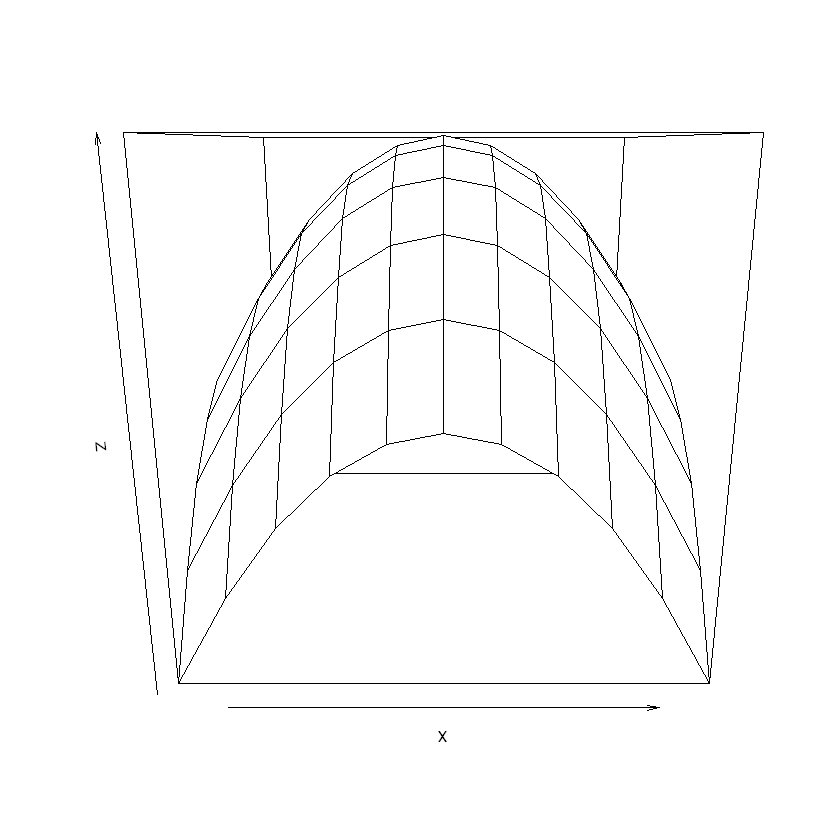

In [30]:
# Set coordinates for the arguments
x <- seq(-5, 5, by = 1)
y <- seq(-5, 5, by = 1)
# Assign corresponding z coordinates
f <- function(x,y){return(-x^2 - y^2)}
z <- outer(x,y,f); 
# Plot
persp(x, y, z)

The vectors $x$ and $y$ have 21 elements each.

In [31]:
x

[1] -5 -4 -3 -2 -1  0  1  2  3  4  5

In [32]:
length(x)

[1] 11

In [33]:
y

[1] -5 -4 -3 -2 -1  0  1  2  3  4  5

In [34]:
length(y)

[1] 11

So an appropriate set of $z$ coordinates will include one $z$ coordinate for each combination of $x$ and $y$. Since there are 11 values for $x$ and 11 values for $y$, we need to have $11\times 11=121$ $z$ coordinates. Further, these coordinates need to be specified in a consistent way so that R knows which of the 121 $z$ coordinates corresponds to which combination of $x$ and $y$. This is exactly what `outer(x,y,f)` does.

In [35]:
z <- outer(x,y,f)
z

-50,-41,-34,-29,-26,-25,-26,-29,-34,-41,-50
-41,-32,-25,-20,-17,-16,-17,-20,-25,-32,-41
-34,-25,-18,-13,-10,-9,-10,-13,-18,-25,-34
-29,-20,-13,-8,-5,-4,-5,-8,-13,-20,-29
-26,-17,-10,-5,-2,-1,-2,-5,-10,-17,-26
-25,-16,-9,-4,-1,0,-1,-4,-9,-16,-25
-26,-17,-10,-5,-2,-1,-2,-5,-10,-17,-26
-29,-20,-13,-8,-5,-4,-5,-8,-13,-20,-29
-34,-25,-18,-13,-10,-9,-10,-13,-18,-25,-34
-41,-32,-25,-20,-17,-16,-17,-20,-25,-32,-41
-50,-41,-34,-29,-26,-25,-26,-29,-34,-41,-50


As you can see `outer(x,y,f)` specifies the $z$-coordinates into a *matrix* (a two-dimensional array) where the element in (row $i$, column $j$) corresponds to the value of the function when $x$ equals the $i$'th element of `x` and $y$ equals the $j$'th element to `y`. For example, the 3rd element of `x` is -3 and the 4th element of `y` is -2. The value of the function when $x=-3$ and $y=-2$ is $f(-3,-2)=-(-3)^2-(-2)^2=-13$. As we can see the element of `z` in (row 3, column 4) is exactly -13. 

Hence, based on this orderly specification of $x$, $y$ and $z$ coordinates, R knows exactly what value of $z$ corresponds to each pair of $x$ and $y$, and is able to plot.

This completes the discussion of {ref}`chapter:3dplotting`. We next turn attention to using R for working with matrices.